# Week 5 Build your own Sentiment Analysis Model: Exercise 5.2

## Build a model with the movie reviews dataset that you worked with in Week 3

***Instructions)***

You will build a model with the movie reviews dataset that you worked with in Week 3: Bag of Words Meets Bags of Popcorn. 

1) Get the stemmed data using the same process you did Week 3.
2) Split this into training and test set.
3) Fit and apply the tf-idf vectorization to the training set.
4) Apply but **DO NOT FIT** the tf-idf vectorization to the test set (Why?).
5) Train a logistic regression using the training data.
6) Find the model accuracy on test set.
7) Create a confusion matrix for the test set predictions.
8) Get the precision, recall, and F1-score for the test set predictions.
9) Create a ROC curve for the test set.
10) Pick another classification model you learned about this week and repeat steps (5) - (9)

***Answer)***

**0) Import, read, and prep the data**

*- Import and Read the data*

In [1]:
import pandas as pd

# importing and reading the data
file_path = 'C:/Users/ivan2/gitLocal/DSC550-WINTER2023/Week3-word2vec-nlp-tutorial/labeledTrainData.tsv/labeledTrainData.tsv'

lbd_train_data = pd.read_csv(file_path, sep='\t')
lbd_train_data.head(5)


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [2]:
lbd_train_data.shape

(25000, 3)

*- Removing HTML*

In [3]:
# Import BeautifulSoup to remove HTML tags
from bs4 import BeautifulSoup

# Define a function to apply BeautifulSoup and get text
def remove_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Appling the BeautifulSoup function directly to the review column
lbd_train_data['review'] = lbd_train_data['review'].apply(remove_html)
print(lbd_train_data['review'][0])

C:\Users\ivan2\AppData\Local\Temp\ipykernel_4812\585573382.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 min

*- Convert all text to lowercase*

In [4]:
# Convert all text to lower case in the data frame
lbd_train_data['review'] = lbd_train_data['review'].str.lower()

*- Remove Punctuations and Special Characters*

In [5]:
import re

# Replace punctuations and special characters with an empty string
# The regular expression '[^\w\s]' matches any character that is not a word character (alphanumeric) or whitespace
lbd_train_data['review'] = lbd_train_data['review'].str.replace('[^\w\s]', '', regex=True)

print(lbd_train_data['review'][0])

with all this stuff going down at the moment with mj ive started listening to his music watching the odd documentary here and there watched the wiz and watched moonwalker again maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent moonwalker is part biography part feature film which i remember going to see at the cinema when it was originally released some of it has subtle messages about mjs feeling towards the press and also the obvious message of drugs are bad mkayvisually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of himthe actual feature film bit when it finally starts is only on for 20 minutes or so e

*- Remove stop words*

In [6]:
# Import the stop word list
from nltk.corpus import stopwords 
print(stopwords.words("english")) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
from nltk.tokenize import word_tokenize

# Load the list of English stop words
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words from a text
def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [w for w in tokens if not w.lower() in stop_words]
    # Join the tokens back into a string
    return ' '.join(filtered_tokens)

# Apply the function to the review column
lbd_train_data['review'] = lbd_train_data['review'].apply(remove_stopwords)

print(lbd_train_data['review'][0])

stuff going moment mj ive started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mjs feeling towards press also obvious message drugs bad mkayvisually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice himthe actual feature film bit finally starts 20 minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pescis character ranted wanted people know supplying drugs etc dunno maybe hates mjs musiclots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually direct

**1) Apply NLTK’s PorterStemmer**

In [8]:
from nltk.stem import PorterStemmer

# Create an instance of the PorterStemmer
stemmer = PorterStemmer()

# Define a function to stem each word in the text
def stem_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Stem each word
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # Join the stemmed words back into a string
    return ' '.join(stemmed_tokens)

# Apply the function to the review column
lbd_train_data['review'] = lbd_train_data['review'].apply(stem_text)

print(lbd_train_data['review'][0])

stuff go moment mj ive start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obviou messag drug bad mkayvisu impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice himth actual featur film bit final start 20 minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj musiclot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scenebottom line movi peopl like mj one level anoth think peo

**2) Split into training and test set**

In [9]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets with an 80-20 split
train_data, test_data = train_test_split(lbd_train_data, test_size=0.2, random_state=42)

# Checking the size of the training and test sets
train_size = train_data.shape[0]
test_size = test_data.shape[0]

train_size, test_size

(20000, 5000)

***Note*** For my future reference, ***'.iloc[0]'*** method is used to view the rows of a dataframe regardless of row index label, instead it looks at position. In this example [0] is the first row of the dataframe. ***'.loc'*** searches by row index.

In [10]:
# viewing the first row of the test_data set.
print(test_data['review'].iloc[0])

read there girl soup came peter sellerss low period watch movi im surpris almost noth happen movi seemingli presenc seller goldi hawn help movi doesnt whole movi seem like randomli film whatev happen without script anyth mayb havent seen everi movi middleag elderli peopl tri hippi one give movi pretti bad nameal seller hawn star much better movi dont wast time pretti worthless


**3) Fit and apply the tf-idf vectorization to the training set**

***Note*** For my future reference, TF-IDF, which stands for Term Frequency-Inverse Document Frequency measures how frequently a term occurs in a document. IDF balances term frequency and gives a chance for less frequent, potentially more meaningful terms to stand out.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Apply TfidfVectorizer to the stemmed reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['review'])

# Convert to a dense array (DataFrame) for easier viewing
tfidf_dense = tfidf_matrix.toarray()

# Convert it to a DataFrame
tfidf_df = pd.DataFrame(tfidf_dense, columns=tfidf_vectorizer.get_feature_names_out())


In [12]:
# dimensions of the tfidf data frame
tfidf_df.shape

(20000, 10000)

**4) Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).**

In [14]:
# Apply the already fitted TfidfVectorizer to the test data, transform but not fit the data.
tfidf_matrix_test = tfidf_vectorizer.transform(test_data['review'])

# Convert to a dense array or (DataFrame) for easier viewing
tfidf_dense_test = tfidf_matrix_test.toarray()

# Convert it to a DataFrame
tfidf_df_test = pd.DataFrame(tfidf_dense_test, columns=tfidf_vectorizer.get_feature_names_out())

**5) Train a logistic regression using the training data.**

I first tried training a logistic regression on the tfidf_df I created from the training data and the work load crashed my machine. the tfidf had almost 100,000 features so I reduced the number of features to max 10000.

After doing that I was able to train the logistic regression model.

In [15]:
from sklearn.linear_model import LogisticRegression

# Preparing the feature matrix (X) and target vector (y)
X_train = tfidf_df.drop('sentiment', axis=1)  # using the TF-IDF dataframe for training data
y_train = train_data['sentiment']  # Target variable

In [16]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

**6) Find the model accuracy on test set**

In [17]:
from sklearn.metrics import accuracy_score

# Preparing the feature matrix (X) and target vector (y)
X_test = tfidf_df_test.drop('sentiment', axis=1) # Using the test data transormed with the same tf-idf vectorizor
y_test = test_data['sentiment'] # Target Variable

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy}")

Model Accuracy on Test Set: 0.884


**7) Create a confusion matrix for the test set predictions**

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
cm = confusion_matrix(y_test, y_pred)

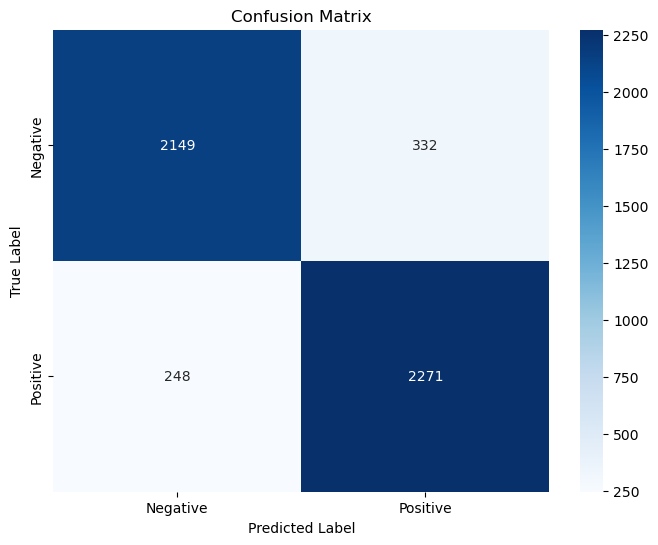

In [20]:
# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**8) Get the precision, recall, and F1-score for the test set predictions.**

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.8724548597771802
Recall: 0.9015482334259627
F1 Score: 0.8867629832096836


**9) Create a ROC curve for the test set.**

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

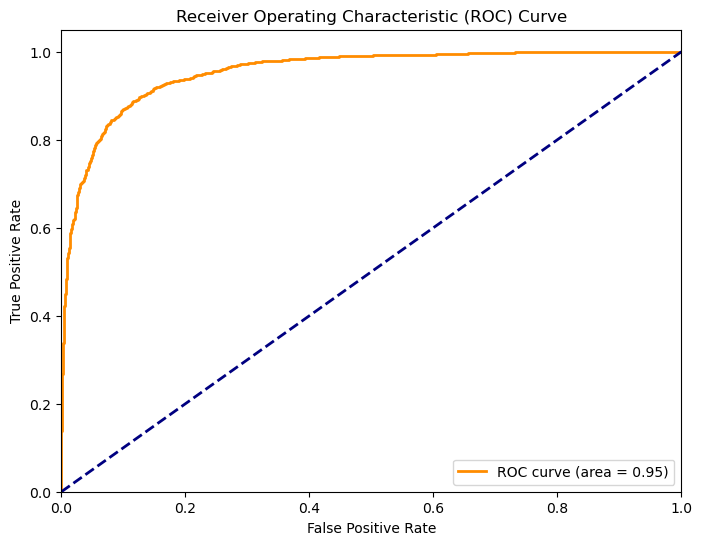

In [23]:
# Get the probability scores for the positive class
y_scores = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve data points
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**10) Pick another classification model you learned about this week and repeat steps (5) - (9)**

I will be using the Naive Bayes classifier.

**#5** First we prepare the training feature set X and y. Then we initialize and fit the classifier to the training data.

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming tfidf_df is your TF-IDF training feature set and train_data['sentiment'] is the target variable
X_train = tfidf_df.drop('sentiment', axis=1)
y_train = train_data['sentiment']

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)



MultinomialNB()

**#6** Finding the model accuracy on test set.

In [25]:
# Assuming tfidf_df_test is your TF-IDF test feature set and test_data['sentiment'] is the actual labels
X_test = tfidf_df_test.drop('sentiment', axis=1)
y_test = test_data['sentiment']

# Use the trained classifier to make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Model Accuracy on Test Set: {accuracy}")

Naive Bayes Model Accuracy on Test Set: 0.855


**#7** Confusion Matrix for test set predictions. 

In [26]:
cmNB = confusion_matrix(y_test, y_pred)

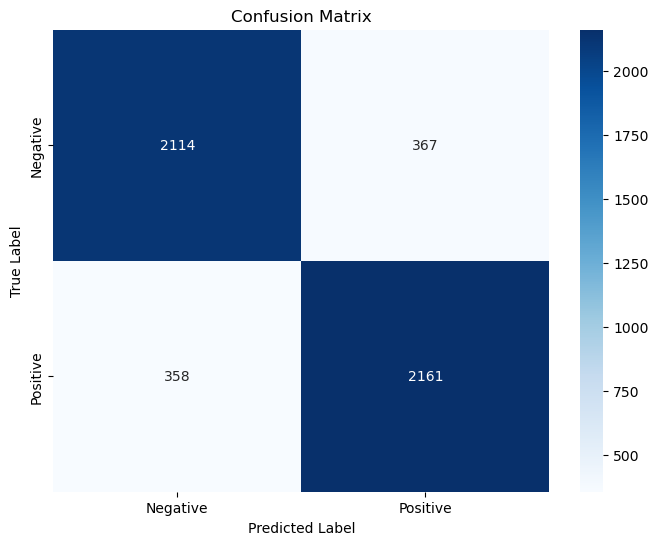

In [27]:
# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cmNB, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**#8** Get the precision, recall, and F1-score for the test set predictions.

In [28]:
precisionNB = precision_score(y_test, y_pred)
recallNB = recall_score(y_test, y_pred)
f1NB = f1_score(y_test, y_pred)

print(f"Precision: {precisionNB}")
print(f"Recall: {recallNB}")
print(f"F1 Score: {f1NB}")

Precision: 0.8548259493670886
Recall: 0.8578801111552203
F1 Score: 0.8563503071131365


**#9** ROC Curve

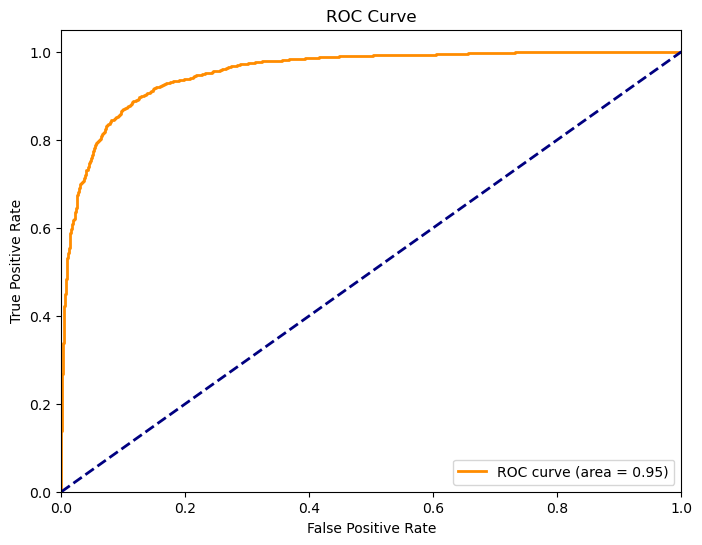

In [29]:
# Get the probability scores for the positive class
y_scoresNB = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve data points
fpr, tpr, thresholds = roc_curve(y_test, y_scoresNB)

# Calculate the AUC
roc_aucNB = roc_auc_score(y_test, y_scoresNB)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_aucNB)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()